In [1]:
import pandas as pd
data = pd.read_csv('dataset.csv')
data = data.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity','Unnamed: 0'], axis=1)
data.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


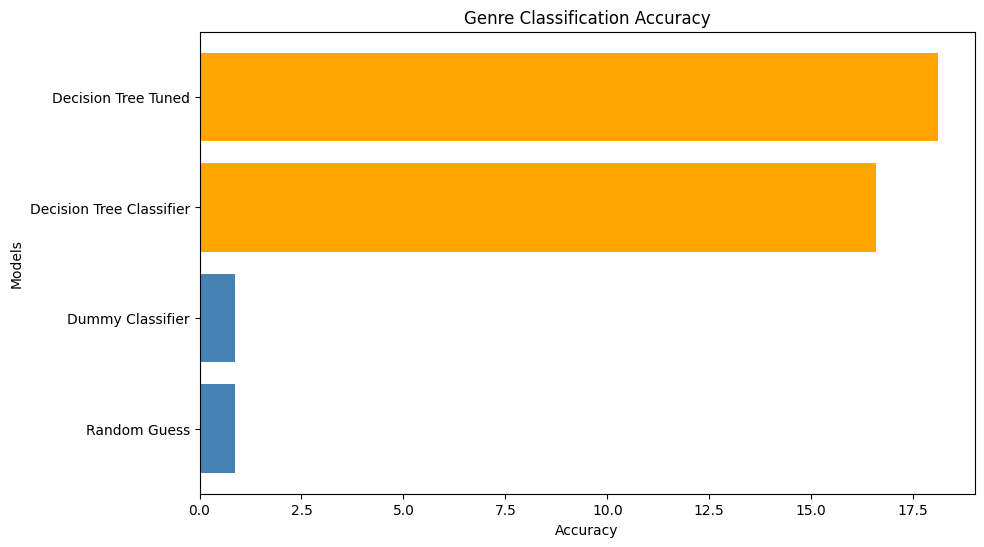

In [2]:
# Plots for Project Update 2. Shows baseline models and decision tree models.
import matplotlib.pyplot as plt
model_names = ["Random Guess", "Dummy Classifier", "Decision Tree Classifier", "Decision Tree Tuned"]
values = [0.877, 0.864, 16.6, 18.1]
colors = ['orange' if model in ["Decision Tree Classifier", "Decision Tree Tuned"] else 'steelblue' for model in model_names]
plt.figure(figsize=(10,6))
plt.barh(model_names, values, color=colors)
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Genre Classification Accuracy')
plt.show()

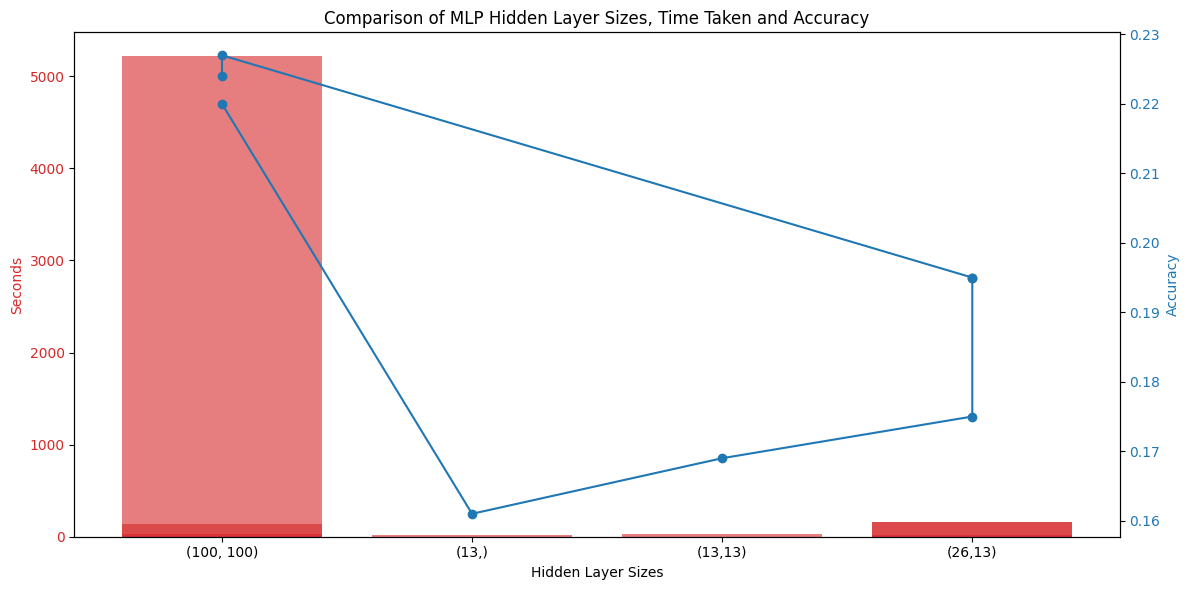

In [5]:
# MLP results
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["MLP", "MLP", "MLP", "MLP", "MLP", "MLP", "MLP", "MLP tuned"]
hidden_layer_sizes = ["(100, 100)", "(13,)", "(13,13)", "(26,13)", "(26,13)", "(26,13)", "(100, 100)", "(100, 100)"]
seconds = [142, 14, 26, 16, 155, 155, 30, 5216]
accuracy = [0.22, 0.161, 0.169, 0.175, 0.195, 0.195, 0.227, 0.224]

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Hidden Layer Sizes')
ax1.set_ylabel('Seconds', color=color)
ax1.bar(hidden_layer_sizes, seconds, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Comparison of MLP Hidden Layer Sizes, Time Taken and Accuracy')

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  
ax2.plot(hidden_layer_sizes, accuracy, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()


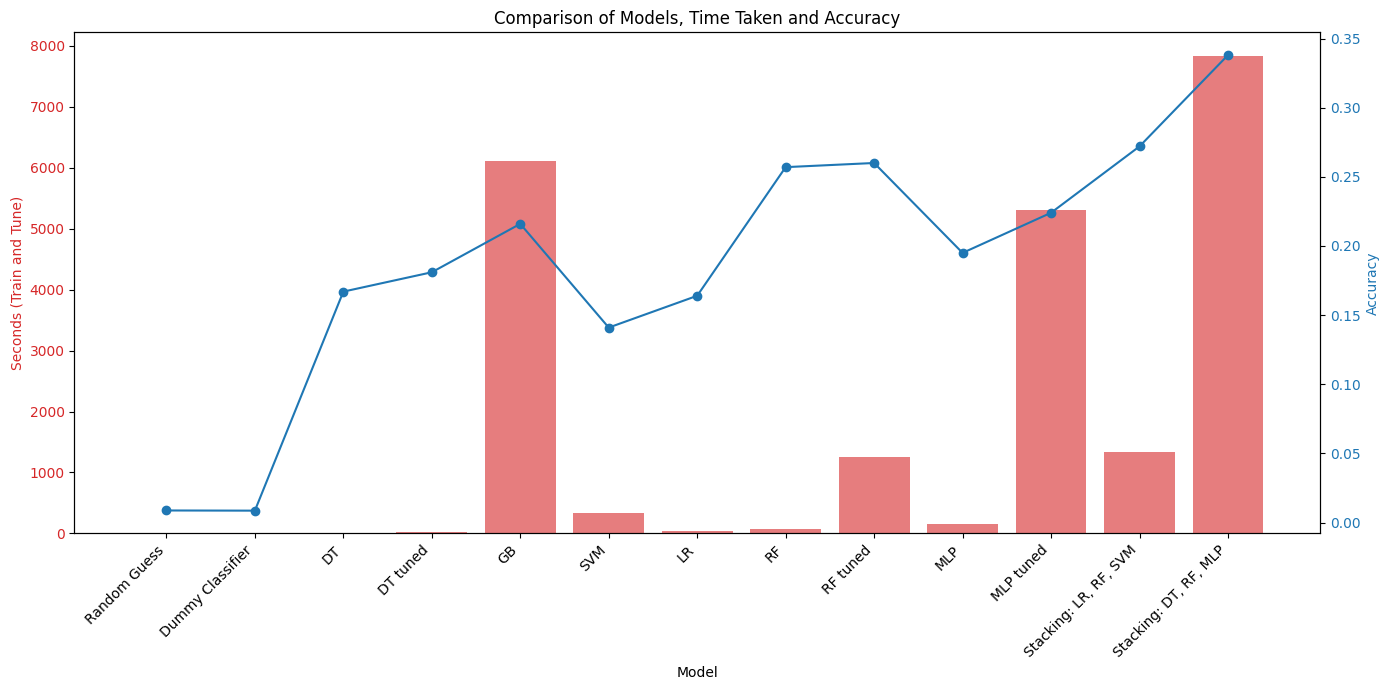

In [4]:
# All genre prediction results
models = ["Random Guess", "Dummy Classifier", "DT", "DT tuned", "GB", "SVM", 
          "LR", "RF", "RF tuned", "MLP", "MLP tuned", "Stacking: LR, RF, SVM", "Stacking: DT, RF, MLP"]
accuracy = [0.00877, 0.00864, 0.167, 0.181, 0.216, 0.141, 0.164, 0.257, 0.26, 0.195, 0.224, 0.272, 0.338]
seconds = [1, 1, 4, 19, 6114, 332, 37, 78, 1248, 155, 5312, 1335, 7832]

# Plot
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Model')
ax1.set_ylabel('Seconds (Train and Tune)', color=color)
ax1.bar(models, seconds, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Comparison of Models, Time Taken and Accuracy')
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  
ax2.plot(models, accuracy, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


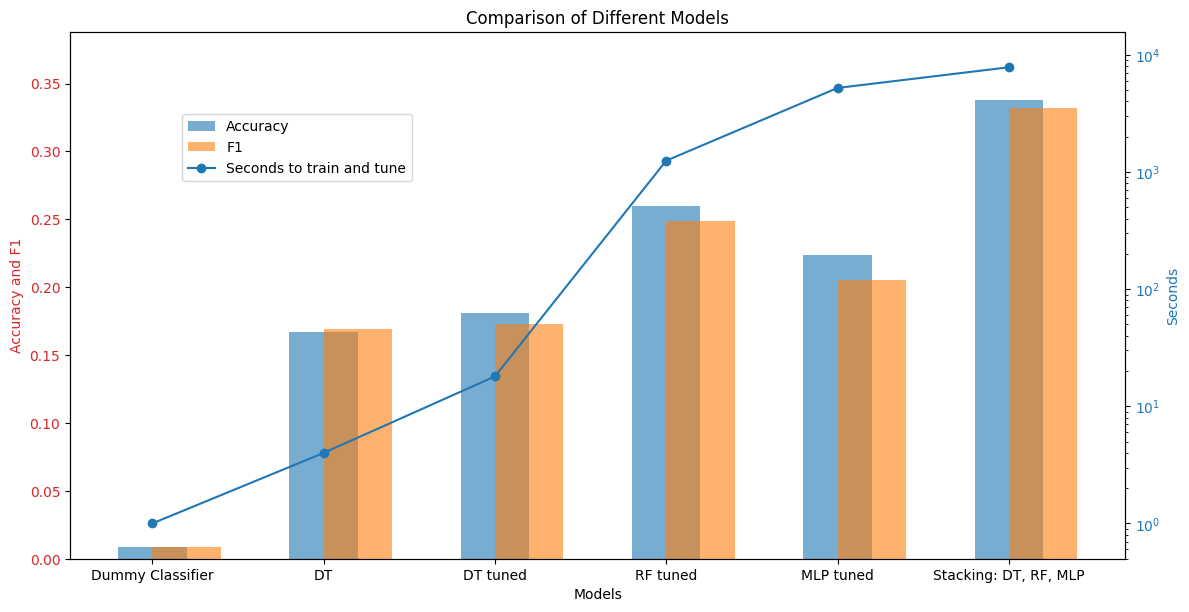

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["Dummy Classifier", "DT", "DT tuned", "RF tuned", "MLP tuned", "Stacking: DT, RF, MLP"]
accuracy = [0.00864, 0.167, 0.181, 0.26, 0.224, 0.338]
f1 = [0.00864, 0.1695, 0.17315, 0.2489, 0.205, 0.332]
seconds = [1, 4, 18, 1249, 5217, 7832]

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy and F1', color=color)
ax1.bar(models, accuracy, color='tab:blue', label='Accuracy', alpha=0.6, width=0.4, align='center')
ax1.bar(models, f1, color='tab:orange', label='F1', alpha=0.6, width=0.4, align='edge')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, max(accuracy + f1) + 0.05)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Seconds', color=color)
ax2.plot(models, seconds, color=color, marker='o', label='Seconds to train and tune')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
ax2.set_ylim(min(seconds)/2, max(seconds) * 2)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))
plt.title("Comparison of Different Models")
plt.show()
